<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Benzene_HMO_Calculator_%26_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

--- Hückel Molecular Orbital Calculation Results for Benzene ---

Molecular Orbital Energies (as x in E = α + xβ):
  E1 = α + (+2.000)β
  E2 = α + (+1.000)β
  E3 = α + (+1.000)β
  E4 = α + (-1.000)β
  E5 = α + (-1.000)β
  E6 = α + (-2.000)β

------------------------------------------------------------



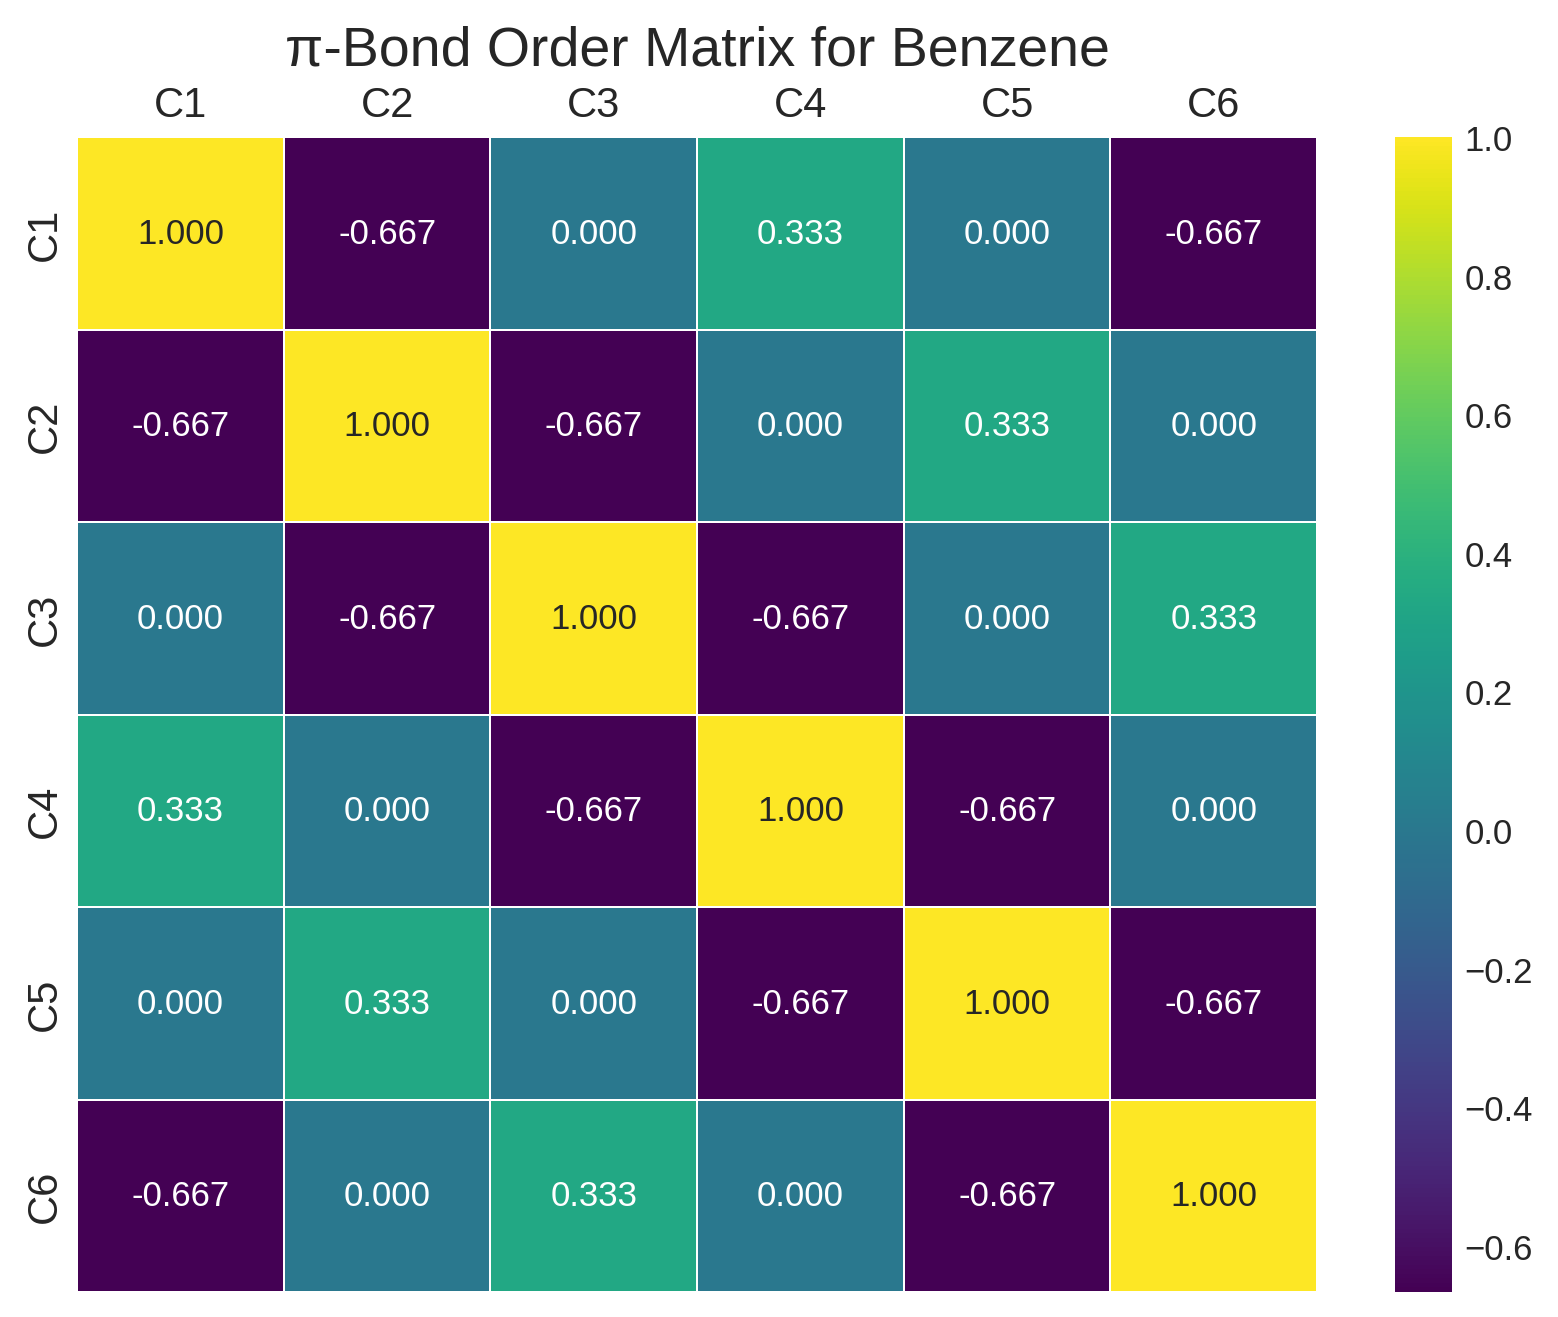

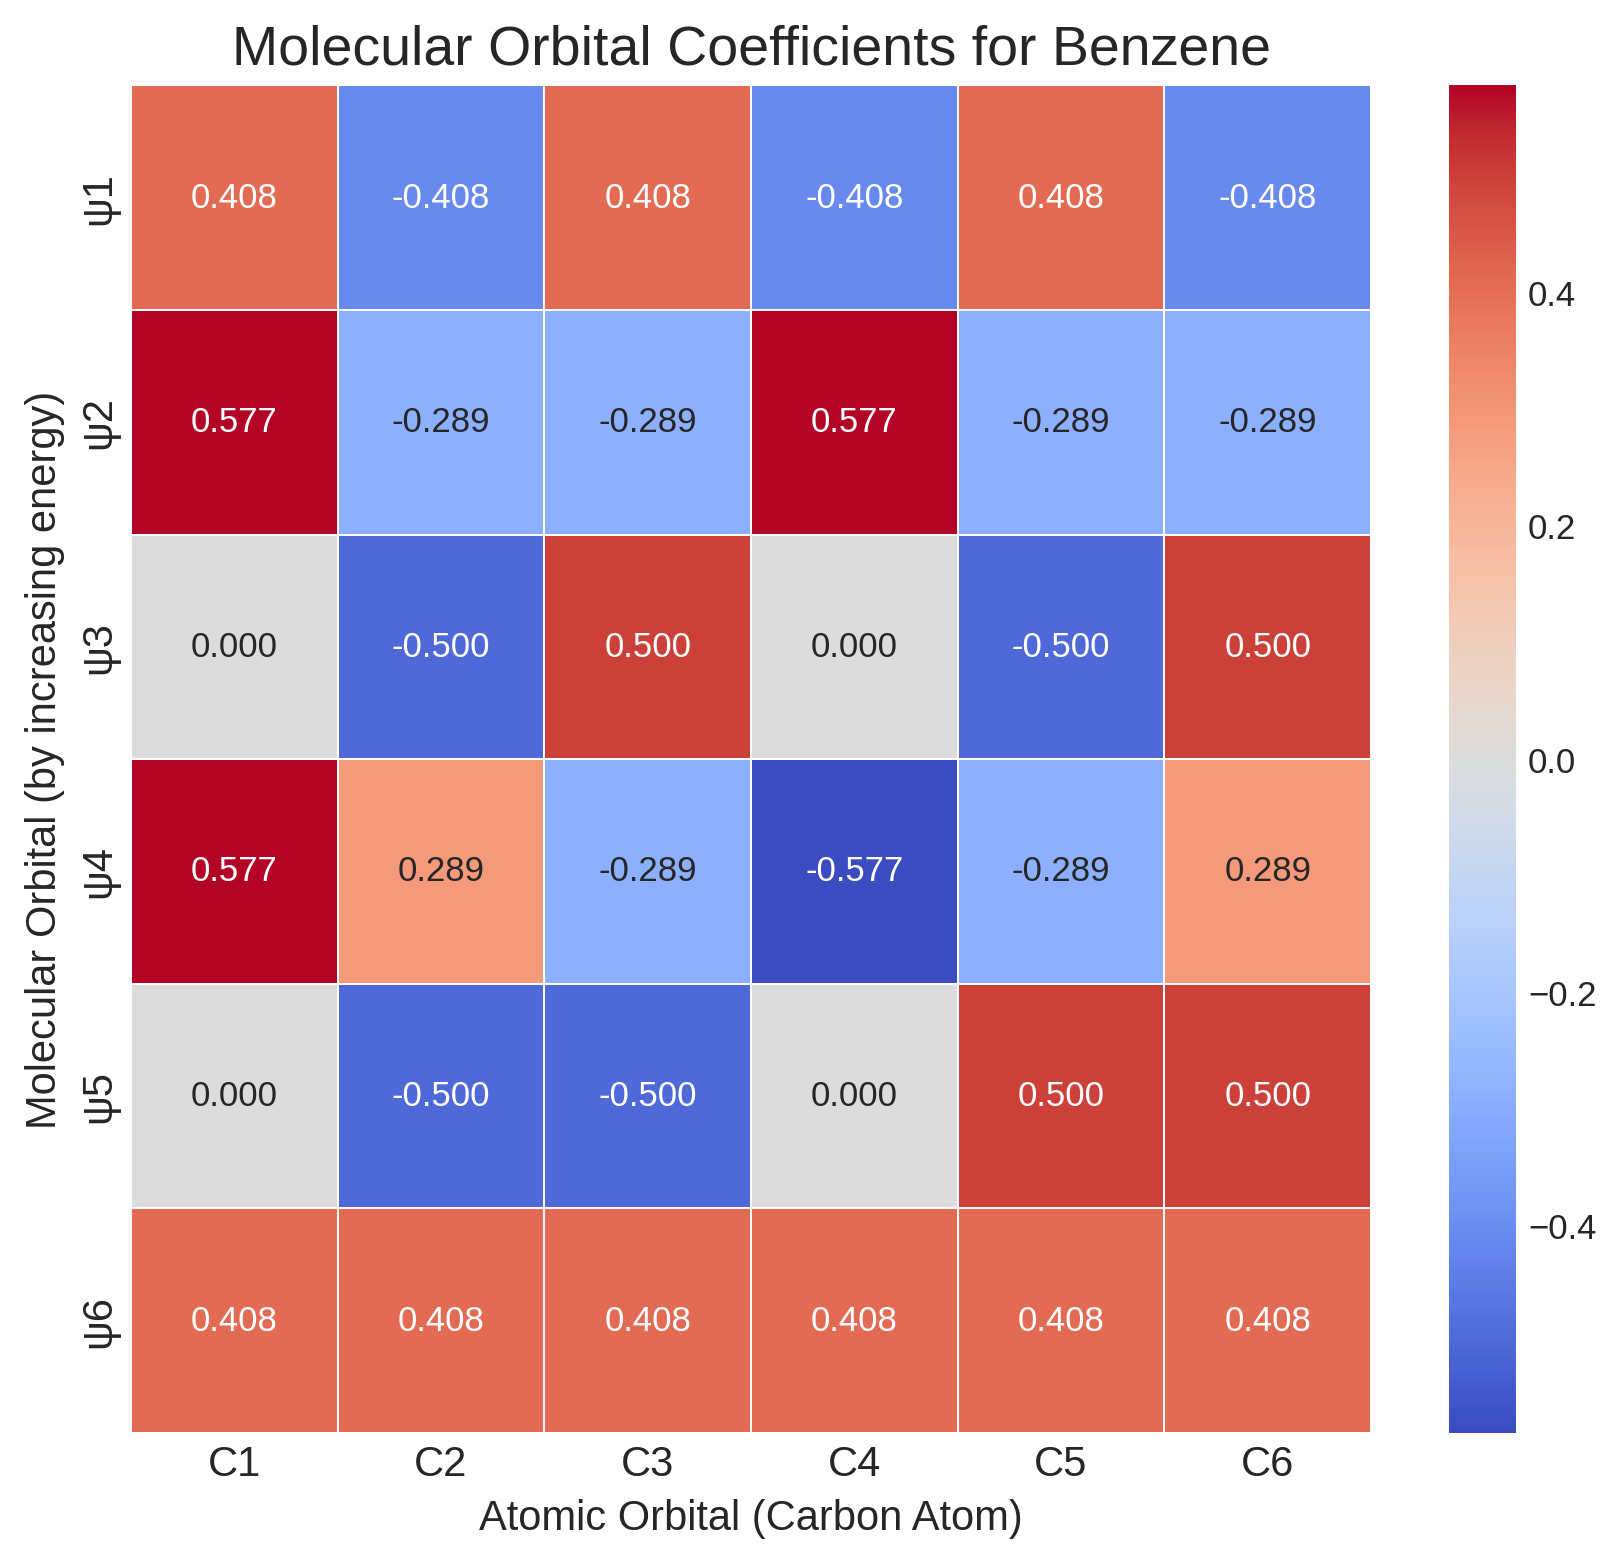

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def huckel_calculation(num_atoms, connectivity):
    """
    Performs Hückel Molecular Orbital calculations for a given molecule.

    Args:
        num_atoms (int): The number of atoms in the conjugated system.
        connectivity (list of tuples): A list where each tuple represents a
                                       bond between two atoms (0-indexed).

    Returns:
        tuple: A tuple containing:
            - eigenvalues (np.ndarray): The energy levels of the MOs (as x in E=α+xβ).
            - eigenvectors (np.ndarray): The coefficients of the AOs for each MO.
            - bond_order_matrix (np.ndarray): The calculated pi-bond order matrix.
    """
    # 1. Construct the Hückel Matrix
    huckel_matrix = np.zeros((num_atoms, num_atoms))

    for i, j in connectivity:
        # Set off-diagonal elements to 1 (representing beta) for adjacent atoms
        # The matrix is symmetric, so H[i,j] = H[j,i]
        huckel_matrix[i, j] = huckel_matrix[j, i] = 1

    # Note: Diagonal elements are already 0 (representing alpha)

    # 2. Solve for Eigenvalues and Eigenvectors
    # np.linalg.eigh is used for symmetric/Hermitian matrices
    eigenvalues, eigenvectors = np.linalg.eigh(huckel_matrix)

    # Eigenvectors are the columns of the resulting matrix.
    # We'll transpose it for easier access later, so each row is an MO.
    coefficients = eigenvectors.T

    # 3. Calculate the Pi-Bond Order Matrix
    bond_order_matrix = np.zeros((num_atoms, num_atoms))

    # Determine the number of occupied molecular orbitals (2 electrons per orbital)
    num_electron_pairs = num_atoms // 2

    # The eigenvalues are sorted from lowest to highest energy, so the first
    # `num_electron_pairs` correspond to the occupied orbitals.
    occupied_mos = coefficients[:num_electron_pairs]

    # The formula for bond order p_rs between atoms r and s is:
    # p_rs = sum(n_j * c_jr * c_js) for all occupied MOs j
    # where n_j is the number of electrons in MO j (which is 2).
    for r in range(num_atoms):
        for s in range(num_atoms):
            p_rs = 0
            for mo in occupied_mos:
                p_rs += 2 * mo[r] * mo[s] # n_j = 2 electrons
            bond_order_matrix[r, s] = p_rs

    return eigenvalues, coefficients, bond_order_matrix

def visualize_hmo_results(molecule_name, num_atoms, coefficients, bond_order_matrix):
    """
    Generates and displays heatmaps for HMO calculation results.
    """
    # --- Visualization 1: Pi-Bond Order Matrix ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig1, ax1 = plt.subplots(figsize=(8, 6), dpi=250)

    atom_labels = [f'C{i+1}' for i in range(num_atoms)]

    sns.heatmap(
        bond_order_matrix,
        ax=ax1,
        annot=True,
        fmt=".3f",
        cmap='viridis',
        linewidths=.5,
        xticklabels=atom_labels,
        yticklabels=atom_labels
    )

    ax1.set_title(f'π-Bond Order Matrix for {molecule_name}', fontsize=16)
    ax1.xaxis.tick_top() # Move x-axis labels to the top for clarity
    ax1.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

    # --- Visualization 2: Molecular Orbital Coefficients ---
    fig2, ax2 = plt.subplots(figsize=(8, 7), dpi=250)

    mo_labels = [f'ψ{i+1}' for i in range(num_atoms)]

    sns.heatmap(
        coefficients,
        ax=ax2,
        annot=True,
        fmt=".3f",
        cmap='coolwarm',
        linewidths=.5,
        xticklabels=atom_labels,
        yticklabels=mo_labels
    )

    ax2.set_title(f'Molecular Orbital Coefficients for {molecule_name}', fontsize=16)
    ax2.set_xlabel('Atomic Orbital (Carbon Atom)', fontsize=12)
    ax2.set_ylabel('Molecular Orbital (by increasing energy)', fontsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    plt.show()


# --- Main Execution for Benzene ---
if __name__ == "__main__":
    # Define Benzene
    N_ATOMS_BENZENE = 6
    # Define the connections in the ring (0-1, 1-2, ..., 5-0)
    CONNECTIVITY_BENZENE = [
        (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)
    ]

    # Perform Calculations
    energies, mo_coeffs, bond_orders = huckel_calculation(N_ATOMS_BENZENE, CONNECTIVITY_BENZENE)

    # Display Results in Console
    print("--- Hückel Molecular Orbital Calculation Results for Benzene ---\n")
    print("Molecular Orbital Energies (as x in E = α + xβ):")
    # The eigenvalues are sorted, let's sort them in descending order for the typical diagram
    energies_sorted = np.sort(energies)[::-1]
    for i, energy in enumerate(energies_sorted):
        print(f"  E{i+1} = α + ({energy:+.3f})β")
    print("\n" + "-"*60 + "\n")

    # Create Visualizations
    visualize_hmo_results("Benzene", N_ATOMS_BENZENE, mo_coeffs, bond_orders)